## Mownit laboratorium 2
### DataFrames

### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.

In [1]:
using DataFrames
using CSV
using Plots
using Statistics

In [2]:
input="results.csv"
data=CSV.read(input)
show(data)

200×3 DataFrame
│ Row │ dimensions │ size    │ time_in_ms │
│     │ Int64⍰     │ Int64⍰  │ Float64⍰   │
├─────┼────────────┼─────────┼────────────┤
│ 1   │ 1          │ 1000000 │ 2.216      │
│ 2   │ 1          │ 1000000 │ 2.2        │
│ 3   │ 1          │ 1000000 │ 2.244      │
│ 4   │ 1          │ 1000000 │ 2.251      │
│ 5   │ 1          │ 1000000 │ 3.623      │
│ 6   │ 1          │ 1000000 │ 2.225      │
│ 7   │ 1          │ 1000000 │ 2.257      │
⋮
│ 193 │ 2          │ 10000   │ 156.241    │
│ 194 │ 2          │ 10000   │ 155.594    │
│ 195 │ 2          │ 10000   │ 155.624    │
│ 196 │ 2          │ 10000   │ 155.486    │
│ 197 │ 2          │ 10000   │ 155.708    │
│ 198 │ 2          │ 10000   │ 155.492    │
│ 199 │ 2          │ 10000   │ 155.528    │
│ 200 │ 2          │ 10000   │ 155.681    │

In [3]:
vtimes=data[data[:, :dimensions] .==1, :]
delete!(vtimes, :dimensions)

┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1


,size,time_in_ms
,Int64⍰,Float64⍰
1,1000000,2.216
2,1000000,2.2
3,1000000,2.244
4,1000000,2.251
5,1000000,3.623
6,1000000,2.225
7,1000000,2.257
8,1000000,2.303
9,1000000,2.269


In [4]:
mtimes=data[data[:, :dimensions] .==2, :]
delete!(mtimes, :dimensions)

┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


,size,time_in_ms
,Int64⍰,Float64⍰
1,1000,1.626
2,1000,1.71
3,1000,1.606
4,1000,1.611
5,1000,3.246
6,1000,1.654
7,1000,1.607
8,1000,2.753
9,1000,1.609


In [5]:
vtimes=by(vtimes, [:size], df -> DataFrame(
        time_mean = mean(df[:time_in_ms]),
        time_sd = sqrt(var(df[:time_in_ms])))
)

,size,time_mean,time_sd
,Int64⍰,Float64,Float64
1,1000000,2.3833,0.436527
2,2000000,4.3685,0.115888
3,3000000,6.3628,0.0381686
4,4000000,8.3903,0.0328635
5,5000000,10.6652,0.735283
6,6000000,12.4772,0.0457768
7,7000000,14.5252,0.0555174
8,8000000,16.558,0.0318224
9,9000000,18.5939,0.0495456


In [6]:
mtimes=by(mtimes, [:size], df -> DataFrame(
        time_mean = mean(df[:time_in_ms]),
        time_sd = sqrt(var(df[:time_in_ms])))
)

,size,time_mean,time_sd
,Int64⍰,Float64,Float64
1,1000,1.9025,0.590635
2,1292,2.6732,0.0182013
3,1668,4.4068,0.0156971
4,2154,7.3127,0.031369
5,2783,12.155,0.0636536
6,3594,20.2278,0.111613
7,4642,33.6542,0.0917446
8,5995,55.9353,0.0250024
9,7743,93.3085,0.0872382


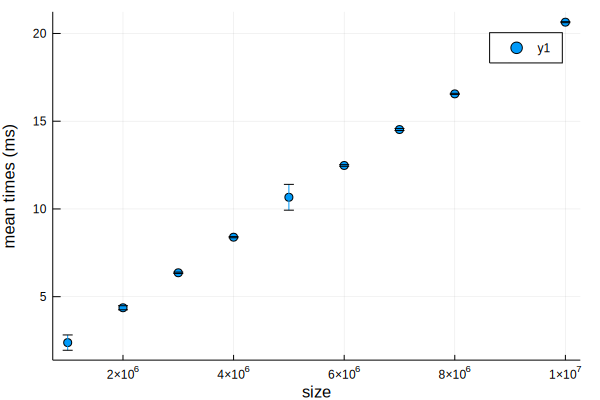

In [11]:
vplot = scatter(
    vtimes[:size],
    vtimes[:time_mean],
    yerr = vtimes[:time_sd],
    markershape = :circle,
    xlabel = "size",
    ylabel = "mean times (ms)"
)

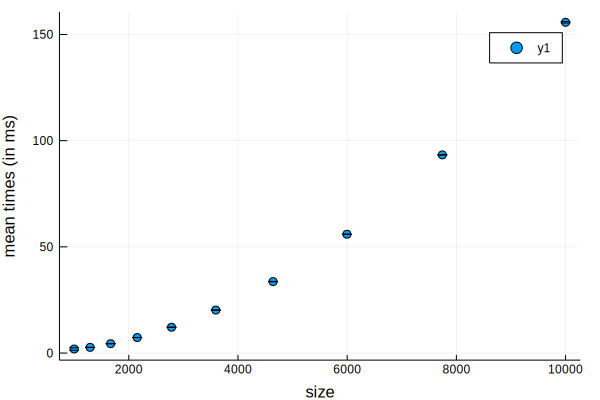

In [10]:
mplot = scatter(
    mtimes[:size],
    mtimes[:time_mean],
    yerr = mtimes[:time_sd],
    markershape = :circle,
    xlabel = "size",
    ylabel = "mean times (in ms)"
)